In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

symbol = 'MSFT'
path = f'../datasets/US_stocks/{symbol}.csv' 
df = pd.read_csv(path)
df_ = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df_.index = pd.DatetimeIndex(df['Date'])
df_.columns = ['Open', f'High', f'Low', f'Close', f'Volume']
df = df_.dropna()

start = '2015-01-01'
end = '2018-01-01'
df = df.loc[(df.index >= start) & (df.index <= end)]

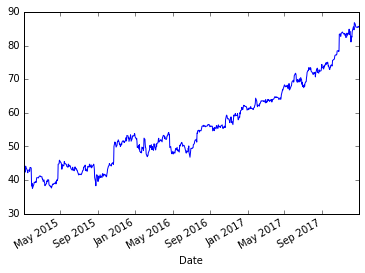

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

df['Close'].plot()

In [3]:
from btbot.cerebro import Cerebro
import backtrader as bt


def get_cerebro(startcash=10000):
    cerebro = Cerebro()
    cerebro.broker.setcash(startcash)
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(bt.analyzers.SharpeRatio_A, _name='sharpe',
                        timeframe=bt.analyzers.TimeFrame.Days)
    cerebro.addobserver(bt.observers.DrawDown)
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
    return cerebro

In [4]:
%%time

from btbot.labelers import SLTPLabeler
from btbot.strategies import SLTPStrategy
from btbot.siders import CrossOverSider

cerebro = get_cerebro()

stock = bt.feeds.PandasData(dataname=df, close=0, volume=1)
cerebro.adddata(stock, name='price')
#  cerebro.adddata(macro, name='macro')
# sampler = CUSUMFilter
# sampler_params = dict(period=20, devfactor=1)
sider = CrossOverSider
# sider = None
sider_params = dict(slow=30, fast=10)
labeler = SLTPLabeler
labeler_params = dict(period=50, horizon=20, sider=None, sider_params={})
cerebro.addstrategy(SLTPStrategy, sider=sider, sider_params=sider_params, size=100,
                    labeler=labeler, labeler_params=labeler_params, tkpf=3, stls=3)
strategy = cerebro.run()[0]

---------------------------- TRADE ---------------------------------
1: Data Name:                            price
2: Bar Num:                              291
3: Current date:                         2016-02-29
4: Status:                               Trade Complete
5: Ref:                                  1
6: PnL:                                  77.36
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            price
2: Bar Num:                              303
3: Current date:                         2016-03-16
4: Status:                               Trade Complete
5: Ref:                                  2
6: PnL:                                  2.98
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            price
2: Bar Num:                  

/home/tom/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


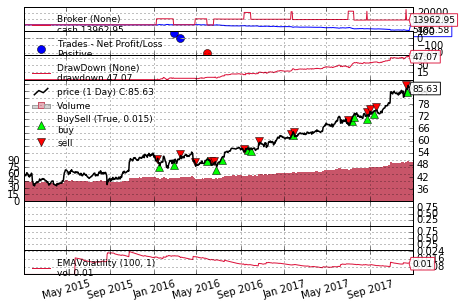

[[<matplotlib.figure.Figure at 0x7f1e5b2009e8>]]

In [5]:
cerebro.plot()

In [6]:
strategy.print_result()

PnL:  -4514.424472841951
Total Return: -45.14424472841951%
Annual Average Return: -18.860554378945483%
Annual SharpeRatio: -1.7
Maximum DrawDown: 48.49 %
Maximum MoneyDown: 5025.1
Maximum Drawdown Length: 474
